<a href="https://colab.research.google.com/github/feaviolp/msc-project/blob/main/NIJ%20statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [292]:
library(haven)
library(dplyr)
library(ggplot2)

In [293]:

NIJ <- read.csv("https://raw.githubusercontent.com/feaviolp/msc-project/main/NIJ_s_Recidivism_Challenge_Full_Dataset_20240222.csv")
View(NIJ)

ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,⋯,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,M,BLACK,43-47,16,false,3,Standard,At least some college,3 or more,⋯,0.00000000,0.000000000,0.4885621,0.4476103,false,false,false,false,false,1
2,M,BLACK,33-37,16,false,6,Specialized,Less than HS diploma,1,⋯,0.00000000,0.000000000,0.4252336,2.0000000,false,true,false,false,true,1
3,M,BLACK,48 or older,24,false,7,High,At least some college,3 or more,⋯,0.16666667,0.000000000,0.0000000,0.0000000,false,true,false,true,false,1
4,M,WHITE,38-42,16,false,7,High,Less than HS diploma,1,⋯,0.00000000,0.000000000,1.0000000,0.7189961,false,false,false,false,false,1
5,M,WHITE,33-37,16,false,4,Specialized,Less than HS diploma,3 or more,⋯,0.05882353,0.000000000,0.2035623,0.9293893,false,true,true,false,false,1
6,M,WHITE,38-42,17,false,5,Standard,High School Diploma,0,⋯,0.00000000,0.000000000,0.6742520,0.3078382,false,false,false,false,false,0
7,M,BLACK,48 or older,18,false,2,Standard,Less than HS diploma,2,⋯,0.00000000,0.000000000,0.0000000,0.0000000,false,true,false,false,true,1
8,M,BLACK,38-42,16,false,5,High,High School Diploma,3 or more,⋯,0.00000000,0.000000000,0.4694464,0.5251618,false,false,false,false,false,0
9,F,BLACK,43-47,5,,7,High,High School Diploma,0,⋯,NA,NA,0.0000000,0.0000000,true,true,true,false,false,1


Remove redundant columns from the datafram

In [294]:
NIJ = subset(NIJ, select = -c(Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample))

Is there a statisitically significant difference in prior arrest episodes and PP violation charges betweeen black males and white males?

Replace null values with appropriate values:

- Gang_Affiliated is missing only for Female offenders so replace with FALSE
- Supervision_Risk_Score_First is INTEGER so replace with the most frequently occuring value
- Supervision_Level_First is CATEGORICAL so replace with the most frequently occuring value
- Prison_Offense is categorical and includes "Other" so replace with "Other"
- Avg_Days_per_DrugTest is FLOAT so replace with average value
- DrugTests_THC_Positive is FLOAT but replace with 0
- DrugTests_Cocaine_Positive is FLOAT but replace with 0
- DrugTests_Meth_Positive is FLOAT but replace with 0
- DrugTests_Other_Positive is FLOAT but replace with 0
- Percent_Days_Employed is FLOAT so replace with average value
- Jobs_Per_Year is FLOAT so replace with average value

In [295]:

NIJ$Gang_Affiliated <- replace(NIJ$Gang_Affiliated, NIJ$Gang_Affiliated == '', 'false')
NIJ$Gang_Affiliated[is.na(NIJ$Gang_Affiliated)]<-FALSE
NIJ$Supervision_Risk_Score_First[is.na(NIJ$Supervision_Risk_Score_First)]<-mode(NIJ$Supervision_Risk_Score_First)
NIJ$Supervision_Level_First [is.na(NIJ$Supervision_Level_First)]<-mode(NIJ$Supervision_Level_First)
NIJ$Prison_Offense[is.na(NIJ$Prison_Offense)]<-'Other'
NIJ$Avg_Days_per_DrugTest[is.na(NIJ$Avg_Days_per_DrugTest)]<-mean(NIJ$Avg_Days_per_DrugTest ,na.rm=TRUE)
NIJ$DrugTests_THC_Positive[is.na(NIJ$DrugTests_THC_Positive)]<-0
NIJ$DrugTests_Cocaine_Positive[is.na(NIJ$DrugTests_Cocaine_Positive)]<-0
NIJ$DrugTests_Meth_Positive[is.na(NIJ$DrugTests_Meth_Positive)]<-0
NIJ$DrugTests_Other_Positive[is.na(NIJ$DrugTests_Other_Positive)]<-0
NIJ$Percent_Days_Employed[is.na(NIJ$Percent_Days_Employed)]<-mean(NIJ$Percent_Days_Employed ,na.rm=TRUE)
NIJ$Jobs_Per_Year[is.na(NIJ$Jobs_Per_Year)]<-mean(NIJ$Jobs_Per_Year ,na.rm=TRUE)

Copy the dataframe to use for descriptive analysis later and replace M and F with Male and Female.

In [296]:
NIJ_orig <- NIJ
NIJ_orig$Gender <- replace(NIJ_orig$Gender, NIJ_orig$Gender == 'M', 'Male')
NIJ_orig$Gender <- replace(NIJ_orig$Gender, NIJ_orig$Gender == 'F', 'Female')

Some features contain integers but max out with, "x or more". To enable numerical analysis the "or more" will be removed and the column changed to integer:

- Dependents: "3 or more" changed to "3"
- Prior_Arrest_Episodes_Felony: "10 more more" changed to "10"
- Prior_Arrest_Episodes_Misd: "6 or more" changed to "6"
- Prior_Arrest_Episodes_Violent: "3 or more" changed to "3"
- Prior_Arrest_Episodes_Property: "5 or more" changed to "5"
- Prior_Arrest_Episodes_Drug: "5 or more" changed to "5"
- Prior_Arrest_Episodes_PPViolationCharges: "5 or more" changed to "5"
- Prior_Conviction_Episodes_Felony.replace: "3 or more" changed to "3"
- Prior_Conviction_Episodes_Misd.replace: "4 or more" changed to "4"
- Prior_Conviction_Episodes_Prop.replace: "3 or more" changed to "3"
- Prior_Conviction_Episodes_Drug.replace: "2 or more" changed to "2"
- Delinquency_Reports: "4 or more" changed to "4"
- Program_Attendances: "10 more more" changed to "10"
- Program_UnexcusedAbsences: "3 or more" changed to "3"
- Residence_Changes: "3 or more" changed to "3"

In [298]:
NIJ$Dependents <- replace(NIJ$Dependents, NIJ$Dependents == '3 or more', '3')
NIJ$Dependents <-  as.integer(NIJ$Dependents)

NIJ$Prior_Arrest_Episodes_Felony <- replace(NIJ$Prior_Arrest_Episodes_Felony, NIJ$Prior_Arrest_Episodes_Felony == '10 or more', '10')
NIJ$Prior_Arrest_Episodes_Felony <-  as.integer(NIJ$Prior_Arrest_Episodes_Felony)

NIJ$Prior_Arrest_Episodes_Misd <- replace(NIJ$Prior_Arrest_Episodes_Misd, NIJ$Prior_Arrest_Episodes_Misd == '6 or more', '6')
NIJ$Prior_Arrest_Episodes_Misd <-  as.integer(NIJ$Prior_Arrest_Episodes_Misd)

NIJ$Prior_Arrest_Episodes_Violent <- replace(NIJ$Prior_Arrest_Episodes_Violent, NIJ$Prior_Arrest_Episodes_Violent == '3 or more', '3')
NIJ$Prior_Arrest_Episodes_Violent <-  as.integer(NIJ$Prior_Arrest_Episodes_Violent)

NIJ$Prior_Arrest_Episodes_Property <- replace(NIJ$Prior_Arrest_Episodes_Property, NIJ$Prior_Arrest_Episodes_Property == '5 or more', '5')
NIJ$Prior_Arrest_Episodes_Property <-  as.integer(NIJ$Prior_Arrest_Episodes_Property)

NIJ$Prior_Arrest_Episodes_Drug <- replace(NIJ$Prior_Arrest_Episodes_Drug, NIJ$Prior_Arrest_Episodes_Drug == '5 or more', '5')
NIJ$Prior_Arrest_Episodes_Drug <-  as.integer(NIJ$Prior_Arrest_Episodes_Drug)

NIJ$Prior_Arrest_Episodes_PPViolationCharges <- replace(NIJ$Prior_Arrest_Episodes_PPViolationCharges, NIJ$Prior_Arrest_Episodes_PPViolationCharges == '5 or more', '5')
NIJ$Prior_Arrest_Episodes_PPViolationCharges <-  as.integer(NIJ$Prior_Arrest_Episodes_PPViolationCharges)

NIJ$Prior_Conviction_Episodes_Felony <- replace(NIJ$Prior_Conviction_Episodes_Felony, NIJ$Prior_Conviction_Episodes_Felony == '3 or more', '3')
NIJ$Prior_Conviction_Episodes_Felony <-  as.integer(NIJ$Prior_Conviction_Episodes_Felony)

NIJ$Prior_Conviction_Episodes_Misd <- replace(NIJ$Prior_Conviction_Episodes_Misd, NIJ$Prior_Conviction_Episodes_Misd == '4 or more', '4')
NIJ$Prior_Conviction_Episodes_Misd <-  as.integer(NIJ$Prior_Conviction_Episodes_Misd)

NIJ$Prior_Conviction_Episodes_Prop <- replace(NIJ$Prior_Conviction_Episodes_Prop, NIJ$Prior_Conviction_Episodes_Prop == '3 or more', '3')
NIJ$Prior_Conviction_Episodes_Prop <-  as.integer(NIJ$Prior_Conviction_Episodes_Prop)

NIJ$Prior_Conviction_Episodes_Drug <- replace(NIJ$Prior_Conviction_Episodes_Drug, NIJ$Prior_Conviction_Episodes_Drug == '2 or more', '2')
NIJ$Prior_Conviction_Episodes_Drug <-  as.integer(NIJ$Prior_Conviction_Episodes_Drug)

NIJ$Delinquency_Reports <- replace(NIJ$Delinquency_Reports, NIJ$Delinquency_Reports == '4 or more', '4')
NIJ$Delinquency_Reports <-  as.integer(NIJ$Delinquency_Reports)

NIJ$Program_Attendances <- replace(NIJ$Program_Attendances, NIJ$Program_Attendances == '10 or more', '10')
NIJ$Program_Attendances <-  as.integer(NIJ$Program_Attendances)

NIJ$Program_UnexcusedAbsences <- replace(NIJ$Program_UnexcusedAbsences, NIJ$Program_UnexcusedAbsences == '3 or more', '3')
NIJ$Program_UnexcusedAbsences <-  as.integer(NIJ$Program_UnexcusedAbsences)

NIJ$Residence_Changes <- replace(NIJ$Residence_Changes, NIJ$Residence_Changes == '3 or more', '3')
NIJ$Residence_Changes <-  as.integer(NIJ$Residence_Changes)


Age_at_Release is populated with ranges which won't be assessed as numeric, so change each value to the first number in each range and convert to integer:

In [299]:

NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '18-22', '18')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '23-27', '23')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '28-32', '28')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '33-37', '33')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '38-42', '38')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '43-47', '43')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '48 or older', '48')

NIJ$Age_at_Release <-  as.integer(NIJ$Age_at_Release)

Prison_Years is populated with range descriptions so change to integer:

In [300]:
NIJ$Prison_Years <- replace(NIJ$Prison_Years, NIJ$Prison_Years == 'Less than 1 year', '0')
NIJ$Prison_Years <- replace(NIJ$Prison_Years, NIJ$Prison_Years == '1-2 years', '1')
NIJ$Prison_Years <- replace(NIJ$Prison_Years, NIJ$Prison_Years == 'Greater than 2 to 3 years', '2')
NIJ$Prison_Years <- replace(NIJ$Prison_Years, NIJ$Prison_Years == 'More than 3 years', '3')

NIJ$Prison_Years <-  as.integer(NIJ$Prison_Years)

Supervision_Level_First
- Standard = 1
- High = 2
- Specialized = 3

Education_Level
- Less than HS diploma = 1
- High School Diploma = 2
- At least some college = 3






In [301]:
NIJ$Supervision_Level_First <- replace(NIJ$Supervision_Level_First, NIJ$Supervision_Level_First == 'Standard', '1')
NIJ$Supervision_Level_First <- replace(NIJ$Supervision_Level_First, NIJ$Supervision_Level_First == 'High', '2')
NIJ$Supervision_Level_First <- replace(NIJ$Supervision_Level_First, NIJ$Supervision_Level_First == 'Specialized', '3')

NIJ$Supervision_Level_First <-  as.integer(NIJ$Supervision_Level_First)

NIJ$Education_Level <- replace(NIJ$Education_Level, NIJ$Education_Level == 'Less than HS diploma', '1')
NIJ$Education_Level <- replace(NIJ$Education_Level, NIJ$Education_Level == 'High School Diploma', '2')
NIJ$Education_Level <- replace(NIJ$Education_Level, NIJ$Education_Level == 'At least some college', '3')

NIJ$Education_Level <-  as.integer(NIJ$Education_Level)

Convert Gender, Race and Recidivism_Within_3years to integers

In [302]:
#NIJ$Gender <-  as.integer(factor(NIJ$Gender))
#NIJ$Race <-  as.integer(factor(NIJ$Race))
#NIJ$Recidivism_Within_3years <-  as.integer(factor(NIJ$Recidivism_Within_3years))



Convert character features to integer

In [303]:
#NIJ$Gender <-  as.integer(factor(NIJ$Gender))
#NIJ$Race <-  as.integer(factor(NIJ$Race))
#NIJ$Gang_Affiliated <-  as.integer(factor(NIJ$Gang_Affiliated))
#NIJ$Supervision_Risk_Score_First <-  as.integer(NIJ$Supervision_Risk_Score_First)
#NIJ$Race <-  as.integer(factor(NIJ$Race))
#NIJ$Race <-  as.integer(factor(NIJ$Race))
#NIJ$Race <-  as.integer(factor(NIJ$Race))
#NIJ$Race <-  as.integer(factor(NIJ$Race))
#NIJ$Race <-  as.integer(factor(NIJ$Race))
#NIJ$Race <-  as.integer(factor(NIJ$Race))
#NIJ$Race <-  as.integer(factor(NIJ$Race))

#NIJ$Recidivism_Within_3years <-  as.integer(factor(NIJ$Recidivism_Within_3years))


Convert boolean and character features to integer

In [304]:
#sapply(NIJ, class)
glimpse(NIJ)

Rows: 25,835
Columns: 50
$ ID                                                <int> 1, 2, 3, 4, 5, 6, 7,…
$ Gender                                            <chr> "M", "M", "M", "M", …
$ Race                                              <chr> "BLACK", "BLACK", "B…
$ Age_at_Release                                    <int> 43, 33, 48, 38, 33, …
$ Residence_PUMA                                    <int> 16, 16, 24, 16, 16, …
$ Gang_Affiliated                                   <chr> "false", "false", "f…
$ Supervision_Risk_Score_First                      <chr> "3", "6", "7", "7", …
$ Supervision_Level_First                           <int> 1, 3, 2, 2, 3, 1, 1,…
$ Education_Level                                   <int> 3, 1, 3, 1, 1, 2, 1,…
$ Dependents                                        <int> 3, 1, 3, 1, 3, 0, 2,…
$ Prison_Offense                                    <chr> "Drug", "Violent/Non…
$ Prison_Years                                      <int> 3, 3, 1, 1, 1, 3, 0,…
$ Prior_Arrest_

In [305]:
NIJ$Gender <-  as.integer(factor(NIJ$Gender))
NIJ$Race <-  as.integer(factor(NIJ$Race))
NIJ$Gang_Affiliated <-  as.integer(factor(NIJ$Gang_Affiliated))
NIJ$Supervision_Risk_Score_First <-  as.integer(NIJ$Supervision_Risk_Score_First)
NIJ$Prison_Offense <-  as.integer(factor(NIJ$Prison_Offense))
NIJ$Prior_Arrest_Episodes_DVCharges <-  as.integer(factor(NIJ$Prior_Arrest_Episodes_DVCharges))
NIJ$Prior_Arrest_Episodes_GunCharges <-  as.integer(factor(NIJ$Prior_Arrest_Episodes_GunCharges))
NIJ$Prior_Conviction_Episodes_Viol <-  as.integer(factor(NIJ$Prior_Conviction_Episodes_Viol))
NIJ$Prior_Conviction_Episodes_PPViolationCharges <-  as.integer(factor(NIJ$Prior_Conviction_Episodes_PPViolationCharges))
NIJ$Prior_Conviction_Episodes_DomesticViolenceCharges <-  as.integer(factor(NIJ$Prior_Conviction_Episodes_DomesticViolenceCharges))
NIJ$Prior_Conviction_Episodes_GunCharges <-  as.integer(factor(NIJ$Prior_Conviction_Episodes_GunCharges))
NIJ$Prior_Revocations_Parole  <-  as.integer(factor(NIJ$Prior_Revocations_Parole ))
NIJ$Prior_Revocations_Probation <-  as.integer(factor(NIJ$Prior_Revocations_Probation))
NIJ$Condition_MH_SA <-  as.integer(factor(NIJ$Condition_MH_SA))
NIJ$Condition_Cog_Ed <-  as.integer(factor(NIJ$Condition_Cog_Ed))
NIJ$Condition_Other <-  as.integer(factor(NIJ$Condition_Other))
NIJ$Violations_ElectronicMonitoring <-  as.integer(factor(NIJ$Violations_ElectronicMonitoring))
NIJ$Violations_Instruction <-  as.integer(factor(NIJ$Violations_Instruction))
NIJ$Violations_FailToReport <-  as.integer(factor(NIJ$Violations_FailToReport))
NIJ$Violations_MoveWithoutPermission <-  as.integer(factor(NIJ$Violations_MoveWithoutPermission))
NIJ$Employment_Exempt <-  as.integer(factor(NIJ$Employment_Exempt))
NIJ$Recidivism_Within_3years <-  as.integer(factor(NIJ$Recidivism_Within_3years))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [306]:
glimpse(NIJ)

Rows: 25,835
Columns: 50
$ ID                                                <int> 1, 2, 3, 4, 5, 6, 7,…
$ Gender                                            <int> 2, 2, 2, 2, 2, 2, 2,…
$ Race                                              <int> 1, 1, 1, 2, 2, 2, 1,…
$ Age_at_Release                                    <int> 43, 33, 48, 38, 33, …
$ Residence_PUMA                                    <int> 16, 16, 24, 16, 16, …
$ Gang_Affiliated                                   <int> 1, 1, 1, 1, 1, 1, 1,…
$ Supervision_Risk_Score_First                      <int> 3, 6, 7, 7, 4, 5, 2,…
$ Supervision_Level_First                           <int> 1, 3, 2, 2, 3, 1, 1,…
$ Education_Level                                   <int> 3, 1, 3, 1, 1, 2, 1,…
$ Dependents                                        <int> 3, 1, 3, 1, 3, 0, 2,…
$ Prison_Offense                                    <int> 2, 5, 2, 4, 5, 4, 1,…
$ Prison_Years                                      <int> 3, 3, 1, 1, 1, 3, 0,…
$ Prior_Arrest_

In [307]:
View(NIJ)

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,⋯,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,2,1,43,16,1,3,1,3,3,⋯,2,612.00000,0.0000000,0,0.00000000,0.000000000,0.4885621,0.4476103,1,1
2,2,2,1,33,16,1,6,3,1,1,⋯,2,35.66667,0.0000000,0,0.00000000,0.000000000,0.4252336,2.0000000,1,2
3,3,2,1,48,24,1,7,2,3,3,⋯,0,93.66667,0.3333333,0,0.16666667,0.000000000,0.0000000,0.0000000,1,2
4,4,2,2,38,16,1,7,2,1,1,⋯,3,25.40000,0.0000000,0,0.00000000,0.000000000,1.0000000,0.7189961,1,1
5,5,2,2,33,16,1,4,3,1,3,⋯,0,23.11765,0.0000000,0,0.05882353,0.000000000,0.2035623,0.9293893,1,2
6,6,2,2,38,17,1,5,1,2,0,⋯,3,474.60000,0.0000000,0,0.00000000,0.000000000,0.6742520,0.3078382,1,1
7,7,2,1,48,18,1,2,1,1,2,⋯,1,238.50000,0.0000000,0,0.00000000,0.000000000,0.0000000,0.0000000,1,2
8,8,2,1,38,16,1,5,2,2,3,⋯,0,34.77500,0.0000000,0,0.00000000,0.000000000,0.4694464,0.5251618,1,1
9,9,1,1,43,5,1,7,2,2,0,⋯,0,93.89004,0.0000000,0,0.00000000,0.000000000,0.0000000,0.0000000,2,2


In [308]:
cor.test(NIJ$Gender, NIJ$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  NIJ$Gender and NIJ$Race
S = 3.3803e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1761865 


Is there a difference in recidivism by race?

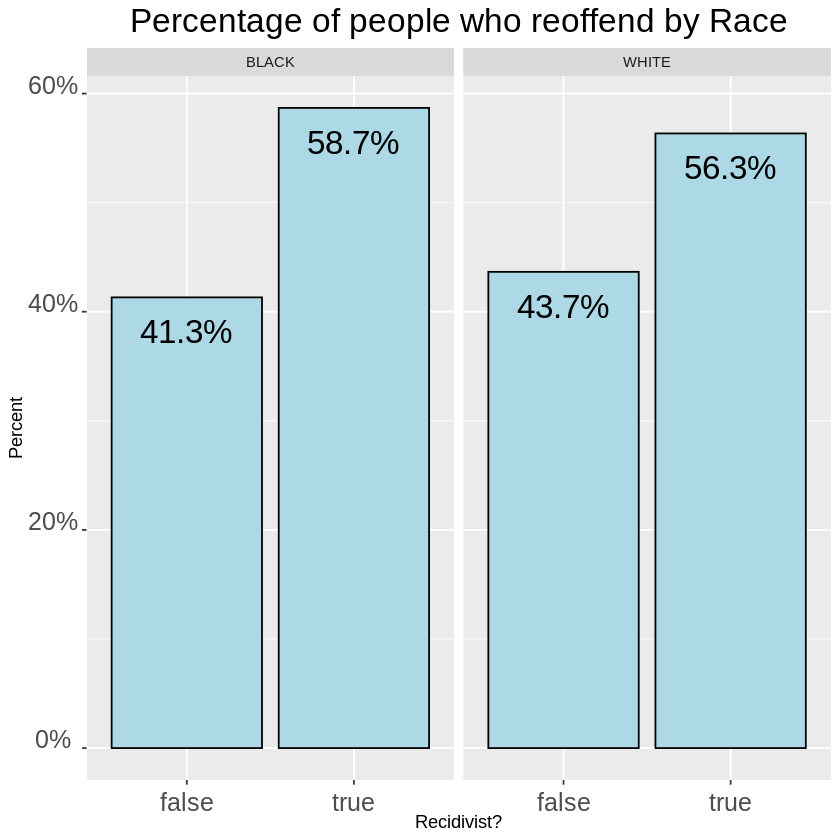

In [309]:
ggplot(NIJ_orig, aes(as_factor(Recidivism_Within_3years))) +
  geom_bar(aes(y=after_stat(prop), group=1), colour='black', fill='lightblue') +
  labs(title='Percentage of people who reoffend by Race', x='Recidivist?', y='Percent') +
  geom_text(aes(label = scales::percent(after_stat(prop)), y=after_stat(prop),group=1), stat='count', vjust=2, size=7) +
  scale_y_continuous(labels=scales::percent) +
  facet_grid(~as_factor(Race)) +
  theme_grey() +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  theme(axis.text.x=element_text(angle=0,hjust=0.5,vjust=0, size=15)) +
  theme(axis.text.y=element_text(angle=0,hjust=0.5,vjust=0, size=15))

In [310]:
table(as_factor(NIJ_orig$Recidivism_Within_3years), as_factor(NIJ_orig$Race))
chisq.test(table(NIJ_orig$Recidivism_Within_3years, NIJ_orig$Race))

       
        BLACK WHITE
  false  6134  4797
  true   8713  6191


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(NIJ_orig$Recidivism_Within_3years, NIJ_orig$Race)
X-squared = 14.094, df = 1, p-value = 0.0001739


Is there a difference in recidivism by gender?

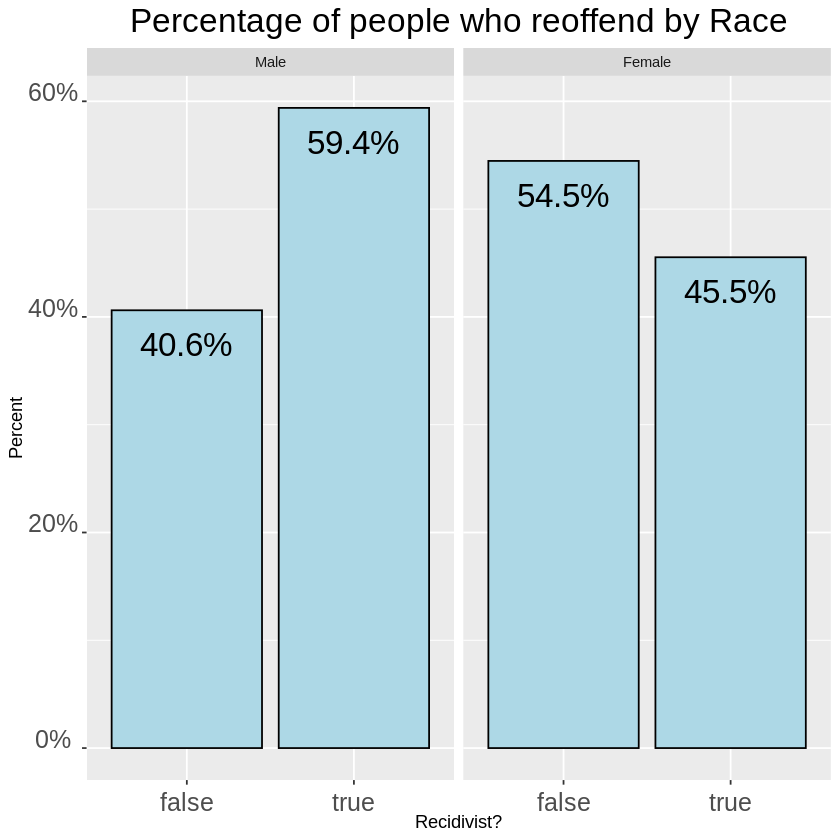

In [311]:
ggplot(NIJ_orig, aes(as_factor(Recidivism_Within_3years))) +
  geom_bar(aes(y=after_stat(prop), group=1), colour='black', fill='lightblue') +
  labs(title='Percentage of people who reoffend by Race', x='Recidivist?', y='Percent') +
  geom_text(aes(label = scales::percent(after_stat(prop)), y=after_stat(prop),group=1), stat='count', vjust=2, size=7) +
  scale_y_continuous(labels=scales::percent) +
  facet_grid(~as_factor(Gender)) +
  theme_grey() +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  theme(axis.text.x=element_text(angle=0,hjust=0.5,vjust=0, size=15)) +
  theme(axis.text.y=element_text(angle=0,hjust=0.5,vjust=0, size=15))

In [312]:
table(as_factor(NIJ_orig$Recidivism_Within_3years), as_factor(NIJ_orig$Gender))
chisq.test(table(NIJ_orig$Recidivism_Within_3years, NIJ_orig$Gender))

       
         Male Female
  false  9206   1725
  true  13462   1442


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(NIJ_orig$Recidivism_Within_3years, NIJ_orig$Gender)
X-squared = 217.99, df = 1, p-value < 2.2e-16


Separate the dataset into Male and Female for comparrison

In [313]:
Male <- subset(NIJ, Gender == 2)
Female <- subset(NIJ, Gender == 1)

In [314]:
wilcox.test(Age_at_Release ~ Race, data=Male)



	Wilcoxon rank sum test with continuity correction

data:  Age_at_Release by Race
W = 52608014, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [315]:
cor.test(Male$Prior_Arrest_Episodes_PPViolationCharges, Male$Race, method='spearman', use='complete.obs')

Warning message in cor.test.default(Male$Prior_Arrest_Episodes_PPViolationCharges, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_PPViolationCharges and Male$Race
S = 1.8188e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06311263 


In [316]:
cor.test(Male$Percent_Days_Employed, Male$Avg_Days_per_DrugTest)



	Pearson's product-moment correlation

data:  Male$Percent_Days_Employed and Male$Avg_Days_per_DrugTest
t = -12.462, df = 22666, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09541010 -0.06955117
sample estimates:
        cor 
-0.08249452 


In [317]:
cor.test(Male$Age_at_Release, Male$Race, method='spearman', use='complete.obs')

Warning message in cor.test.default(Male$Age_at_Release, Male$Race, method = "spearman", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  Male$Age_at_Release and Male$Race
S = 1.7059e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1212351 


In [318]:
cor.test(Male$Age_at_Release, Male$Gang_Affiliated, method='spearman', use='complete.obs')

Warning message in cor.test.default(Male$Age_at_Release, Male$Gang_Affiliated, method = "spearman", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  Male$Age_at_Release and Male$Gang_Affiliated
S = 2.543e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3099705 


Is there a statisitically significant difference in felony prior arest episodes betweeen black males and white males?

In [319]:
ks.test(Male$Race, 'pnorm')

Warning message in ks.test.default(Male$Race, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  Male$Race
D = 0.84134, p-value < 2.2e-16
alternative hypothesis: two-sided


In [320]:
ks.test(Male$Prior_Arrest_Episodes_Felony, 'pnorm')

Warning message in ks.test.default(Male$Prior_Arrest_Episodes_Felony, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  Male$Prior_Arrest_Episodes_Felony
D = 0.88395, p-value < 2.2e-16
alternative hypothesis: two-sided


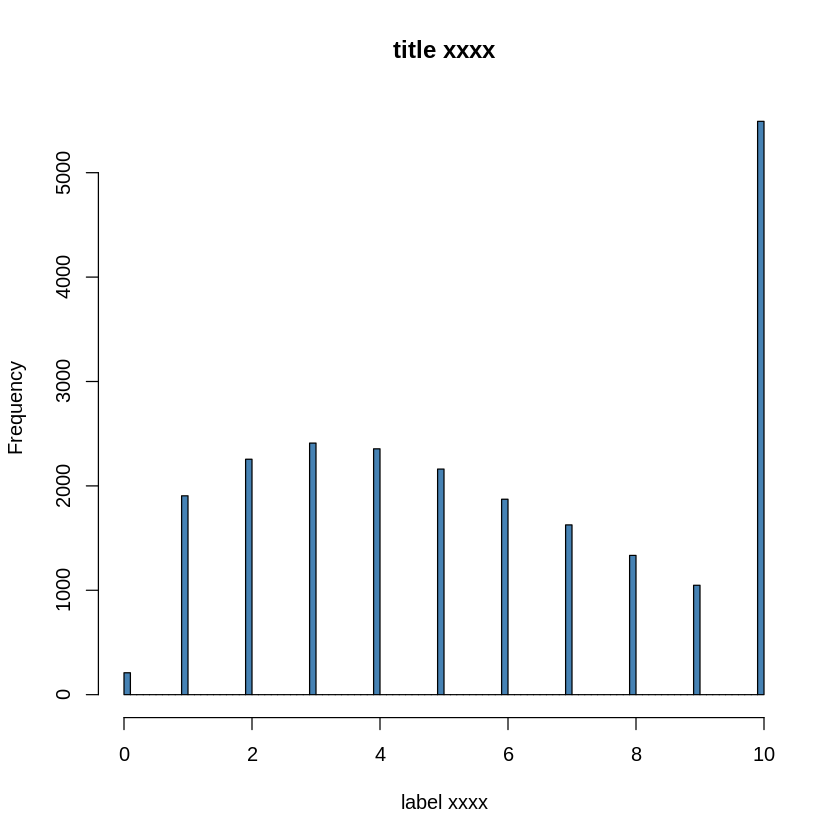

In [321]:
hist(Male$Prior_Arrest_Episodes_Felony,
  breaks=100,
  col='steelblue',
  main='title xxxx',
  xlab = 'label xxxx')

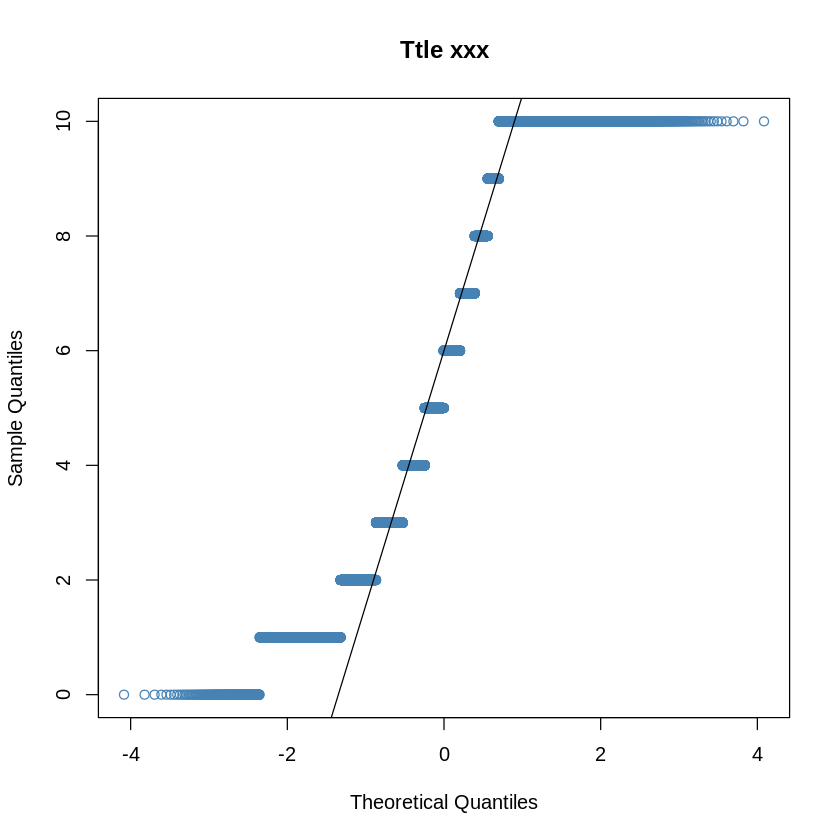

In [322]:
qqnorm(Male$Prior_Arrest_Episodes_Felony,
  col='steelblue',
  main='Ttle xxx',)
qqline(Male$Prior_Arrest_Episodes_Felony)

Not normal distribution so use Spearman's rank

In [323]:
cor.test(Male$Prior_Arrest_Episodes_Felony, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Felony and Male$Race
S = 1.8924e+12, p-value = 0.0001484
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02519452 


Is there a statisitically significant difference in property prior arest episodes betweeen black males and white males?

In [324]:
ks.test(Male$Prior_Arrest_Episodes_Property, 'pnorm')

Warning message in ks.test.default(Male$Prior_Arrest_Episodes_Property, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  Male$Prior_Arrest_Episodes_Property
D = 0.58385, p-value < 2.2e-16
alternative hypothesis: two-sided


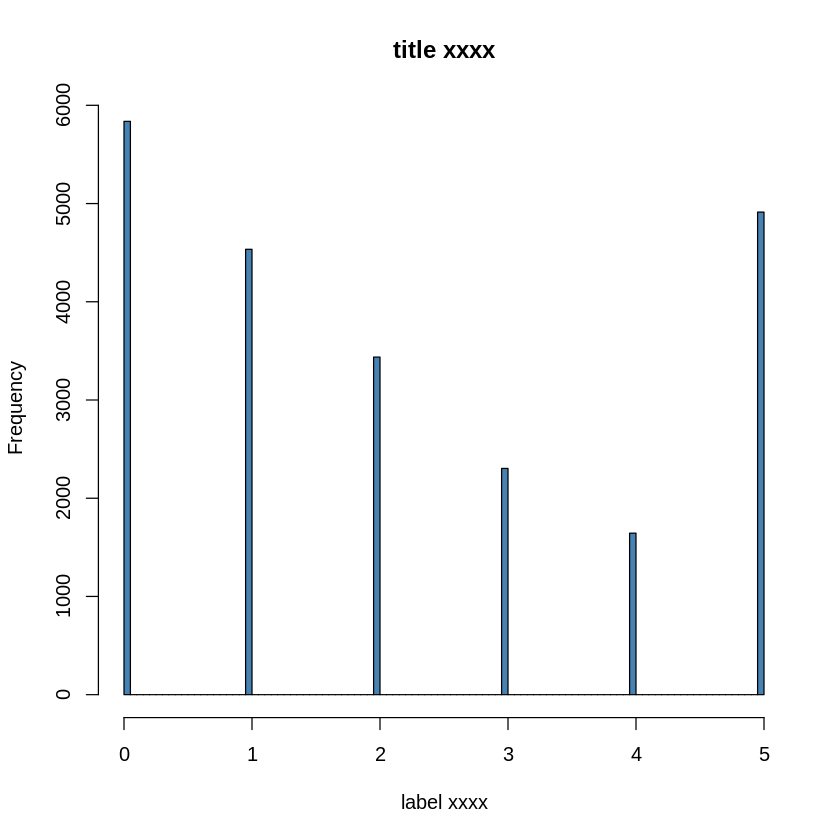

In [325]:
hist(Male$Prior_Arrest_Episodes_Property,
  breaks=100,
  col='steelblue',
  main='title xxxx',
  xlab = 'label xxxx')

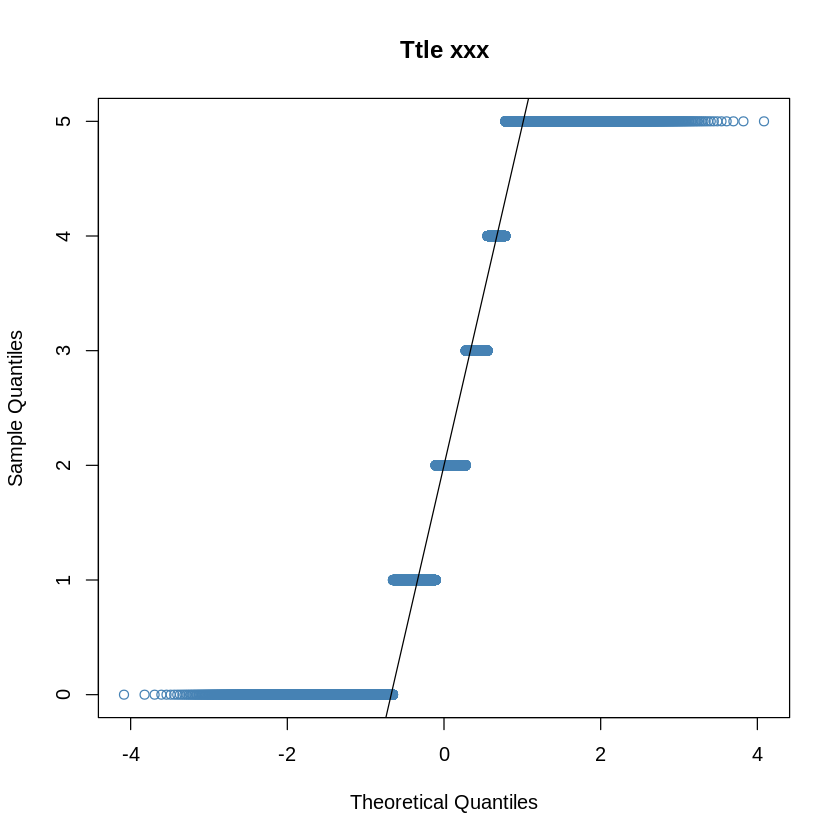

In [326]:
qqnorm(Male$Prior_Arrest_Episodes_Property,
  col='steelblue',
  main='Ttle xxx',)
qqline(Male$Prior_Arrest_Episodes_Property)

Not normal distribution so use Spearman's rank

In [327]:
cor.test(Male$Prior_Arrest_Episodes_Property, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Property and Male$Race
S = 1.7408e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.103253 


Is there a statisitically significant difference in supervision risk score betweeen black males and white males?

In [328]:
ks.test(Male$Supervision_Risk_Score_First, 'pnorm')

Warning message in ks.test.default(Male$Supervision_Risk_Score_First, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  Male$Supervision_Risk_Score_First
D = 0.94656, p-value < 2.2e-16
alternative hypothesis: two-sided


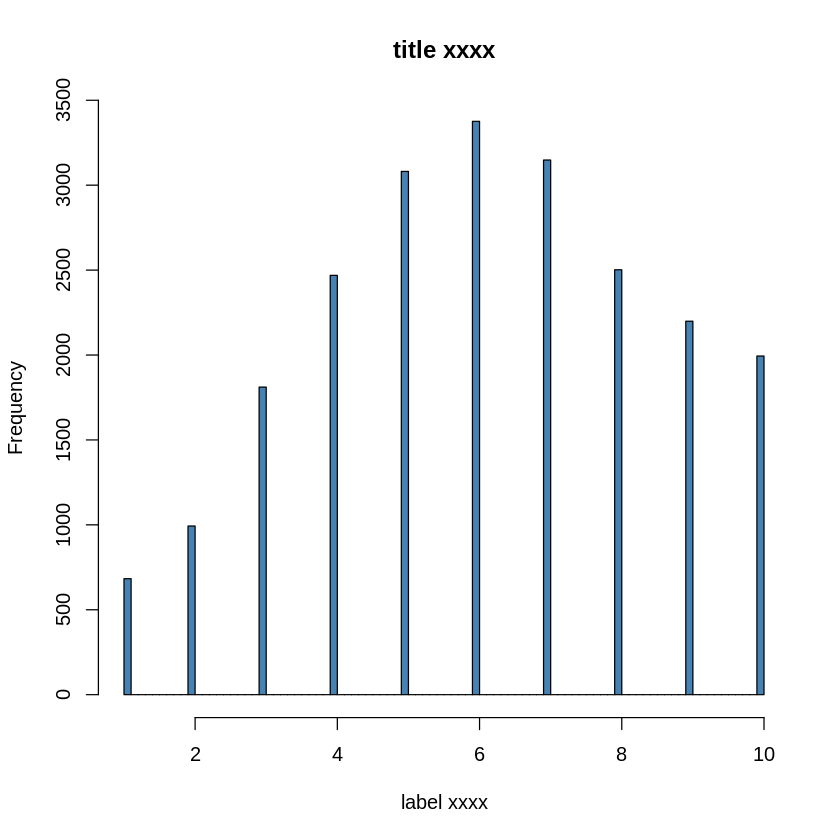

In [329]:
hist(Male$Supervision_Risk_Score_First,
  breaks=100,
  col='steelblue',
  main='title xxxx',
  xlab = 'label xxxx')

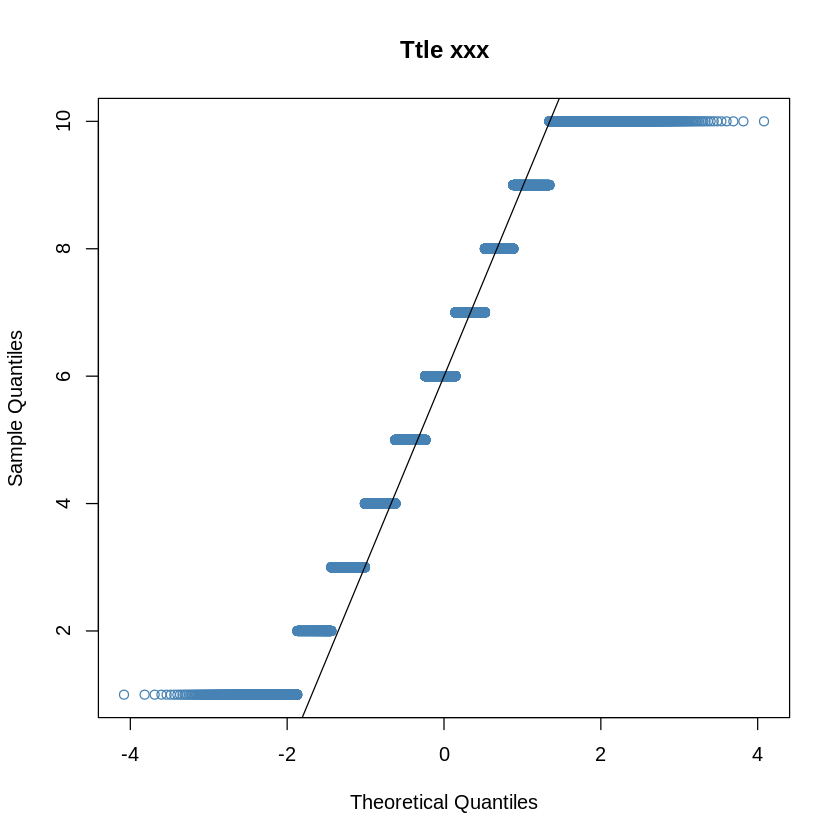

In [330]:
qqnorm(Male$Supervision_Risk_Score_First,
  col='steelblue',
  main='Ttle xxx',)
qqline(Male$Supervision_Risk_Score_First)

Not normal distribution so use Spearman's rank

In [331]:
cor.test(Male$Supervision_Risk_Score_First, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Supervision_Risk_Score_First and Male$Race
S = 1.9347e+12, p-value = 2.548e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.05299592 


Is there a statisitically significant difference in misdemeanour prior arrest episodes betweeen black males and white males?

Is there a statisitically significant difference in misdemeanour prior conviction episodes betweeen black males and white males?

Is there a statisitically significant difference in property prior conviction episodes betweeen black males and white males?

Is there a statisitically significant difference in percentage of days employed betweeen black males and white males?


Is there a statisitically significant difference in age betweeen black males and white males?

In [332]:
ks.test(Male$Age_at_Release, 'pnorm')

Warning message in ks.test.default(Male$Age_at_Release, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  Male$Age_at_Release
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


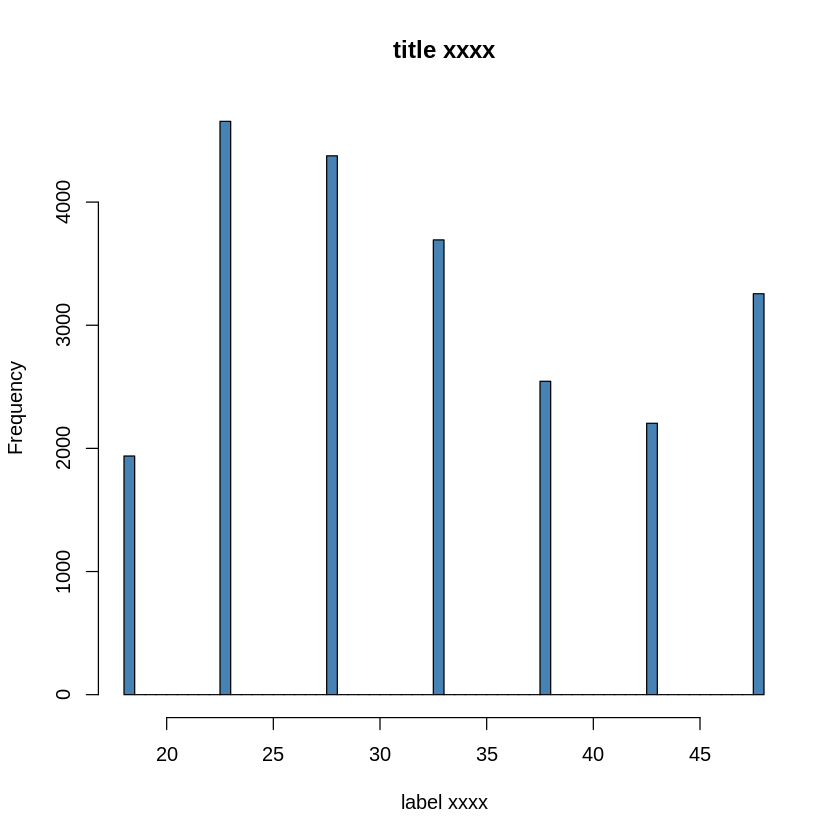

In [333]:
hist(Male$Age_at_Release,
  breaks=100,
  col='steelblue',
  main='title xxxx',
  xlab = 'label xxxx')

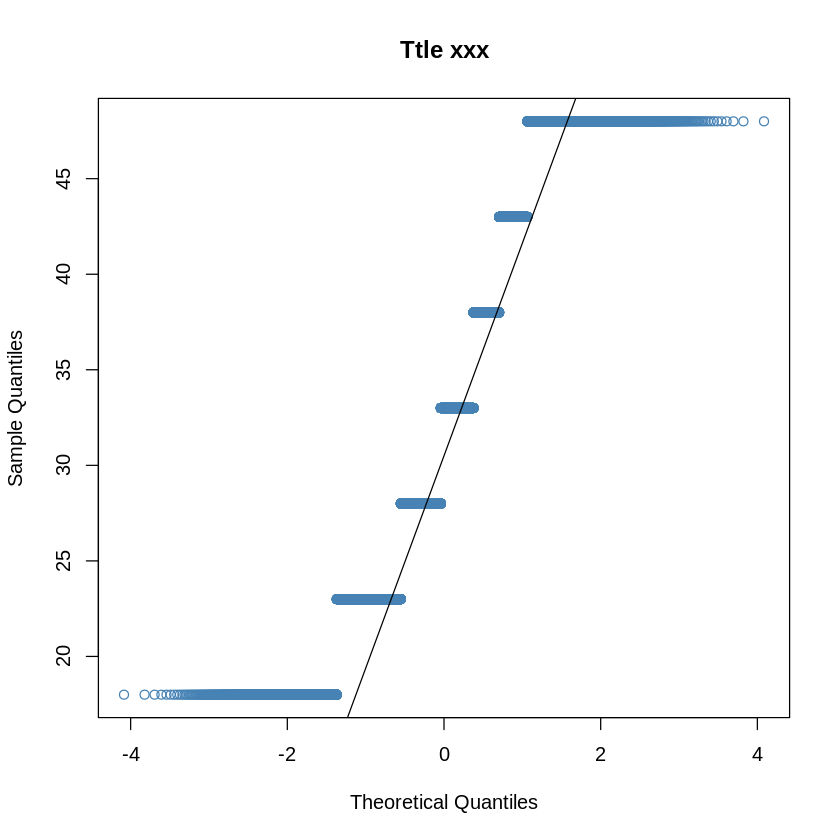

In [334]:
qqnorm(Male$Age_at_Release,
  col='steelblue',
  main='Ttle xxx',)
qqline(Male$Age_at_Release)

Not normal distribution so use Spearman's rank

In [335]:
cor.test(Male$Age_at_Release, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Age_at_Release and Male$Race
S = 1.7059e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1212351 


Is there a statisitically significant difference in positive Meth drug tests betweeen black males and white males?

In [336]:
cor.test(Male$DrugTests_Meth_Positive, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$DrugTests_Meth_Positive and Male$Race
S = 1.399e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.279359 


Is there a statisitically significant difference in residence areas betweeen black males and white males?

In [337]:
cor.test(Male$Residence_PUMA, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Residence_PUMA and Male$Race
S = 1.6717e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1388776 


Is there a statisitically significant difference in positive THC drug tests betweeen black men and white men?

In [338]:
cor.test(Male$DrugTests_THC_Positive, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$DrugTests_THC_Positive and Male$Race
S = 2.2531e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.160628 


Is there a statisitically significant difference in positive cocaine drug tests betweeen black males and white males?

In [339]:
cor.test(Male$DrugTests_Cocaine_Positive, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$DrugTests_Cocaine_Positive and Male$Race
S = 2.1904e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1283088 


Is there a statisitically significant difference in violent non-sexual offences betweeen black males and white males?

Is there a statisitically significant difference in violence prior arrest episodes betweeen black males and white males?

Is there a statisitically significant difference in mental health or substance abuse conditions betweeen black men and white men?

Is there a statisitically significant difference in percentage of days employed betweeen black males and white males?

Is there a statisitically significant difference in jobs per year betweeen black males and white males?

Is there a statisitically significant difference in gang affiliation betweeen black males and white males?

Is there a statisitically significant difference in violence prior arrest episodes betweeen black females and white females?

In [340]:
cor.test(Female$Prior_Arrest_Episodes_Violent, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Violent and Female$Race
S = 6422727039, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2131837 


In [341]:
ks.test(NIJ$Race, 'pnorm')

Warning message in ks.test.default(NIJ$Race, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  NIJ$Race
D = 0.84134, p-value < 2.2e-16
alternative hypothesis: two-sided


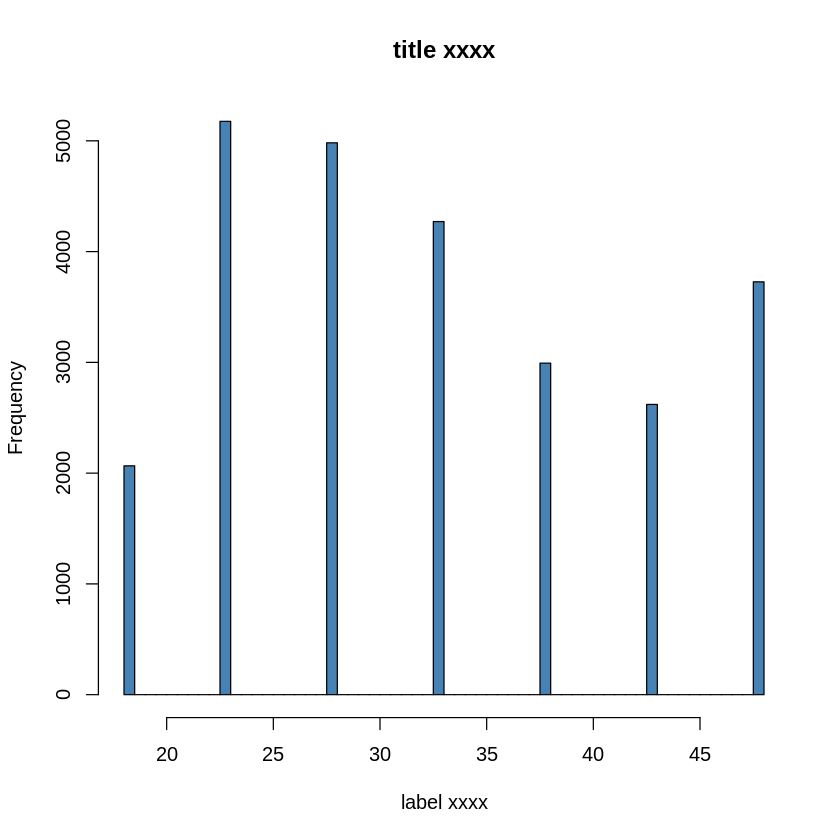

In [342]:
hist(NIJ$Age_at_Release,
  breaks=100,
  col='steelblue',
  main='title xxxx',
  xlab = 'label xxxx')

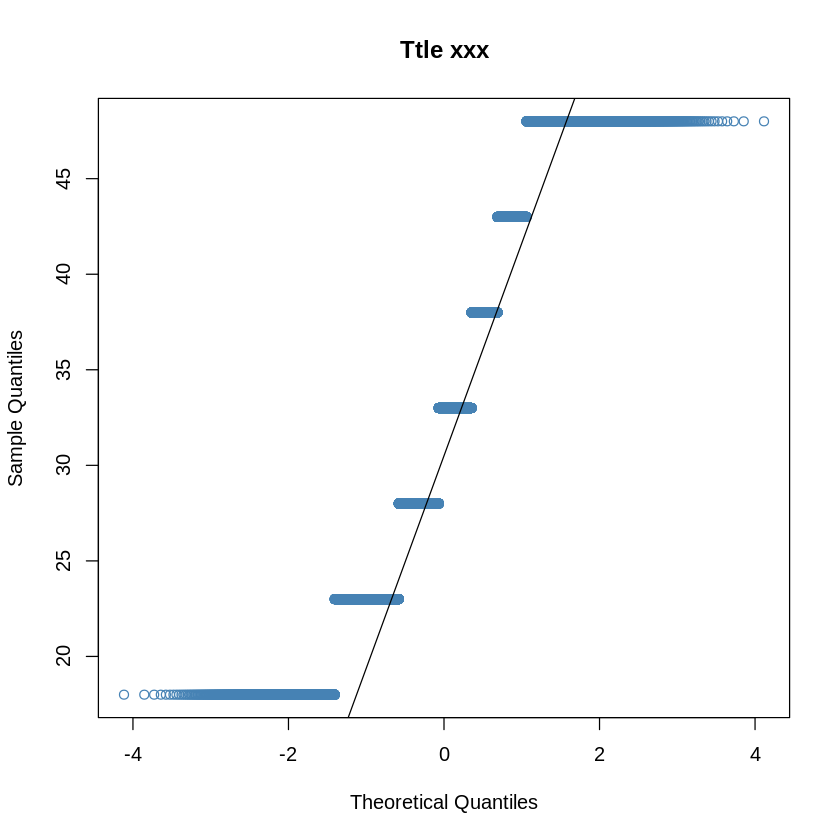

In [343]:
qqnorm(NIJ$Age_at_Release,
  col='steelblue',
  main='Ttle xxx',)
qqline(NIJ$Age_at_Release)